In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
df = pd.read_csv("car_age_price.csv")
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [80]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [81]:
X = df[['Year']]
y = df['Price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [84]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE: 53534.77957001264
MSE: 4326906256.829671
RMSE: 65779.22359552195
R2 Score: 0.36759313425902185


In [85]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [86]:
print("Lasso Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression Performance
MAE: 53534.73464390959
MSE: 4326901608.19506
RMSE: 65779.18826038415
R2 Score: 0.36759381368868127


In [87]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ]
})

results

,Model,R2 Score,RMSE
0,Linear Regression,0.367593,65779.223596
1,Lasso Regression,0.367594,65779.188260


In [88]:
year_2022 = pd.DataFrame([[2022]], columns=['Year'])

predicted_price_2022_lr = lr.predict(year_2022)[0]
predicted_price_2022_lasso = lasso.predict(year_2022)[0]

print("Predicted price for 2022 model (Linear):", predicted_price_2022_lr)
print("Predicted price for 2022 model (Lasso):", predicted_price_2022_lasso)

Predicted price for 2022 model (Linear): 743601.6159450412
Predicted price for 2022 model (Lasso): 743601.3917776793


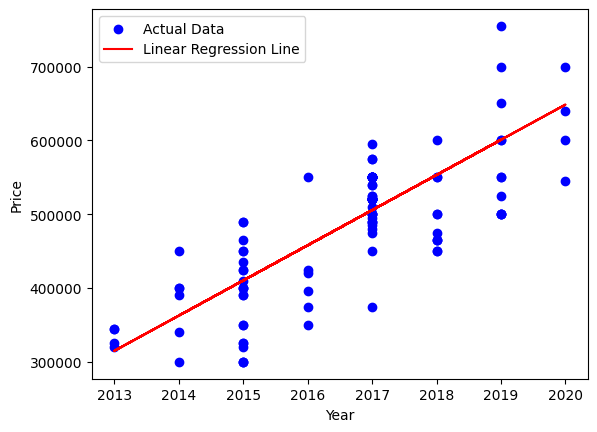

In [89]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, lr.predict(X), color='red', label='Linear Regression Line')
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()